. Simulate an AR(2) process. Fit AR(2) using Yule-Walker and Burg methods. Compare parameter estimates and residuals.


In [ ]:
%pip install numpy matplotlib scipy statsmodels spectrum


     ---------------------------------------- 0.0/231.5 kB ? eta -:--:--
     --- --------------------------------- 20.5/231.5 kB 330.3 kB/s eta 0:00:01
     ----------- ------------------------- 71.7/231.5 kB 787.7 kB/s eta 0:00:01
     -------------------------------------- 231.5/231.5 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.7/9.8 MB 15.0 MB/s eta 0:00:01
   ---------- ----------------------------- 2.5/9.8 MB 26.7 MB/s eta 0:00:01
   -------------- ------------------------- 3.6/9.8 MB 25.4 MB/s eta 0:00:01
   ---------------------------- ----------- 7.0/9.8 MB 37


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


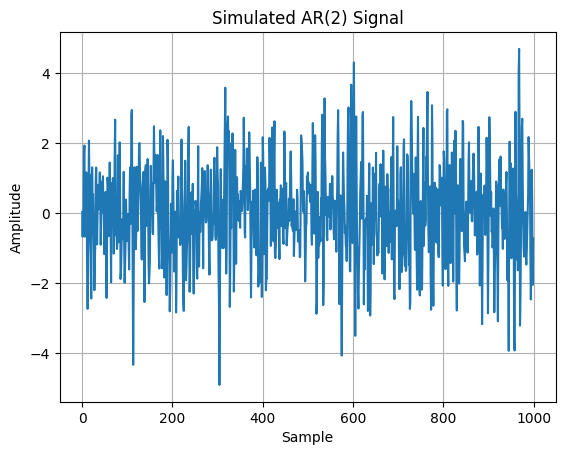

Yule-Walker Estimated AR Coefficients: [-0.73381532  0.49798638]
Yule-Walker Estimated Noise Variance: 1.009703437062859
Burg Estimated AR Coefficients: [0.49647956]
Burg Estimated Noise Variance: [-0.48954276  0.49647956]


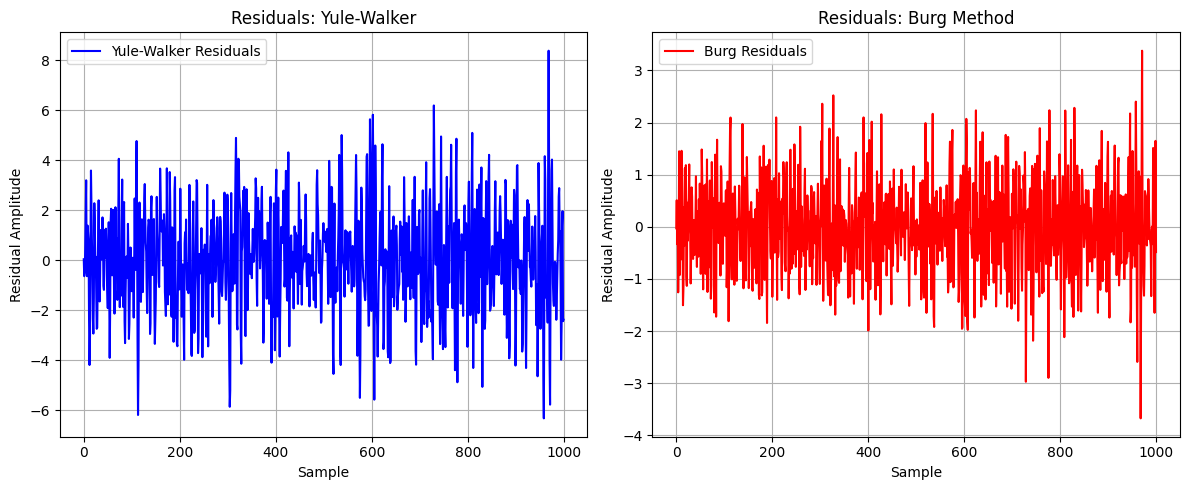

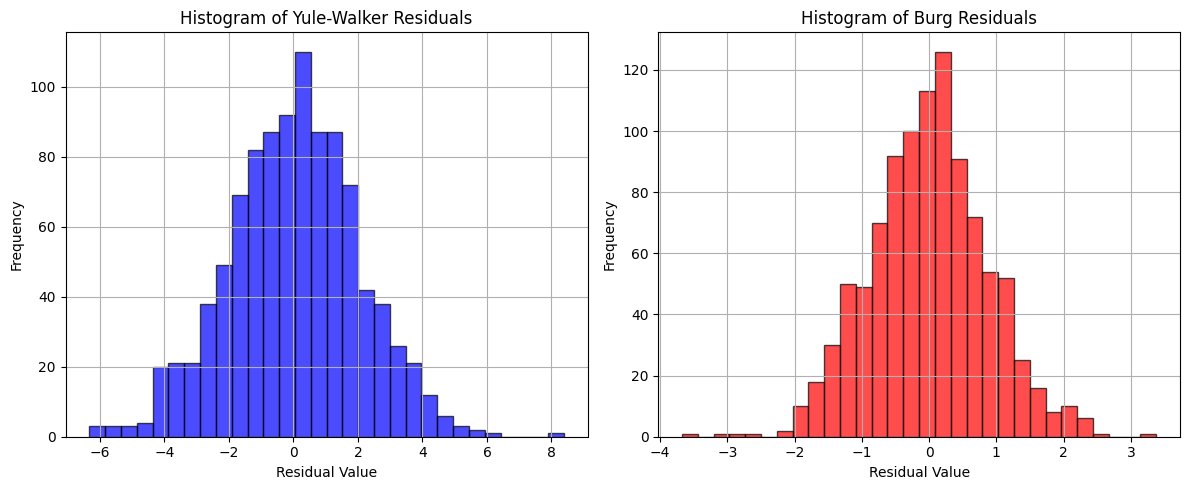

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, correlate
from statsmodels.regression.linear_model import yule_walker
from spectrum import aryule  

# --- 1. Simulate an AR(2) Process ---
N = 1000
w = np.random.normal(0, 1, N)
a = [1, -0.75, 0.5]
ar_signal = lfilter([1], a, w)

plt.figure()
plt.plot(ar_signal)
plt.title("Simulated AR(2) Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# --- 2. Parameter Estimation using Yule-Walker ---
rho, sigma = yule_walker(ar_signal, order=2)
ar_params_yw = -rho
print("Yule-Walker Estimated AR Coefficients:", ar_params_yw)
print("Yule-Walker Estimated Noise Variance:", sigma)

A_yw = np.concatenate(([1], -ar_params_yw))
resid_yw = lfilter(A_yw, [1], ar_signal)

ar_coeffs, reflection, noise_burg = aryule(ar_signal, order=2)

ar_params_burg = ar_coeffs[1:]
print("Burg Estimated AR Coefficients:", ar_params_burg)
print("Burg Estimated Noise Variance:", noise_burg)

# Compute residuals for Burg estimation
resid_burg = lfilter(ar_coeffs, [1], ar_signal)

# --- 4. Compare Residuals ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(resid_yw, color='blue', label='Yule-Walker Residuals')
plt.title("Residuals: Yule-Walker")
plt.xlabel("Sample")
plt.ylabel("Residual Amplitude")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(resid_burg, color='red', label='Burg Residuals')
plt.title("Residuals: Burg Method")
plt.xlabel("Sample")
plt.ylabel("Residual Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 5. Optional: Histogram of Residuals for Comparison ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(resid_yw, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title("Histogram of Yule-Walker Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(resid_burg, bins=30, color='red', alpha=0.7, edgecolor='black')
plt.title("Histogram of Burg Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()
